<a href="https://colab.research.google.com/github/Shriansh16/NLP/blob/main/Detecting_Hate_Speech_and_Offensive_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/archive (24).zip'

Archive:  /content/archive (24).zip
  inflating: labeled_data.csv        


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/labeled_data.csv')

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df1=df[['class','tweet']]

In [6]:
df1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
df1.isnull().sum()

class    0
tweet    0
dtype: int64

In [8]:
df1.duplicated().sum()

0

<Axes: >

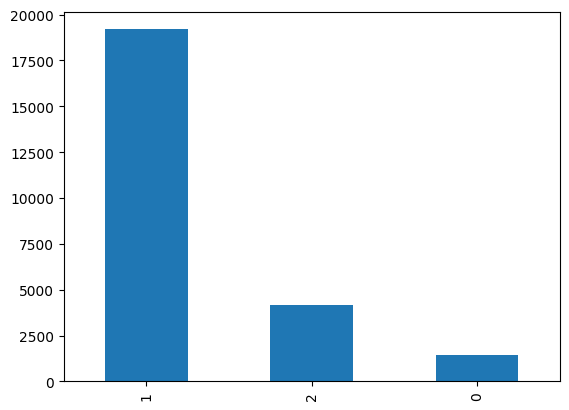

In [9]:
df['class'].value_counts().plot(kind='bar')

0 - Hate speech

1 - Offensive language

2 - None of the above

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer

In [11]:
lemma=WordNetLemmatizer()

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
df1.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
import re

In [15]:
df['tweet'][0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [16]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
def preprocess_tweet(tweet):
    words = nltk.word_tokenize(tweet)
    words1 = [lemma.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words1)

In [18]:
df1['tweet']=df['tweet'].apply(preprocess_tweet)

<ipython-input-18-f1cc26f7aea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweet']=df['tweet'].apply(preprocess_tweet)


In [19]:
df1.head()

,class,tweet
0,2,! ! ! RT @ mayasolovely : As woman n't complai...
1,1,! ! ! ! ! RT @ mleew17 : boy dat cold ... tyga...
2,1,! ! ! ! ! ! ! RT @ UrKindOfBrand Dawg ! ! ! ! ...
3,1,! ! ! ! ! ! ! ! ! RT @ C_G_Anderson : @ viva_b...
4,1,! ! ! ! ! ! ! ! ! ! ! ! ! RT @ ShenikaRoberts ...


In [20]:
df1['tweet'][2]

'! ! ! ! ! ! ! RT @ UrKindOfBrand Dawg ! ! ! ! RT @ 80sbaby4life : You ever fuck bitch start cry ? You confused shit'

In [43]:
def reg_ex(text):
  text1=re.sub(r'^.*?:', '', text)
  text1=text1.lower()
  return text1
def reg_ex2(text):
  text1=re.sub(r"@[A-Za-z0-9_]+", " ", text)
  text1=re.sub('RT', ' ', text)
  text1=re.sub(r"https?", " ", text)
  text1=re.sub('[^a-zA-Z]', ' ', text)
  return text1

In [46]:
df1['tweet']=df1['tweet'].apply(reg_ex)

<ipython-input-46-cf1c963fb013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweet']=df1['tweet'].apply(reg_ex)


In [47]:
df1['tweet']=df1['tweet'].apply(reg_ex2)

<ipython-input-47-6a950300efab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweet']=df1['tweet'].apply(reg_ex2)


In [49]:
df1['tweet'][1]

'boy dat cold ... tyga dwn bad cuffin dat hoe 1st place ! !'

In [50]:
df1['tweet'][5]

"the shit blow .. claim faithful somebody still fucking hoe ! & # 128514 ; & # 128514 ; & # 128514 ; ''"

In [54]:
df1.head()

,class,tweet
0,2,as woman n't complain cleaning house . & amp ;...
1,1,boy dat cold ... tyga dwn bad cuffin dat hoe 1...
2,1,you ever fuck bitch start cry ? you confused shit
3,1,@ viva_based look like tranny
4,1,the shit hear might true might faker bitch tol...


In [55]:
import gensim
from gensim.models import KeyedVectors

In [56]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [59]:
tweet_text=df1['tweet'].apply(gensim.utils.simple_preprocess)

In [60]:
tweet_text

0        [as, woman, complain, cleaning, house, amp, ma...
1        [boy, dat, cold, tyga, dwn, bad, cuffin, dat, ...
2        [you, ever, fuck, bitch, start, cry, you, conf...
3                         [viva_based, look, like, tranny]
4        [the, shit, hear, might, true, might, faker, b...
                               ...                        
24778    [corey_emanuel, right, his, tl, trash, now, mi...
24779    [ve, gone, broke, wrong, heart, baby, drove, r...
24780    [young, buck, wan, na, eat, dat, nigguh, like,...
24781                [youu, got, wild, bitch, tellin, lie]
24782                                       [co, dyebvnzb]
Name: tweet, Length: 24783, dtype: object

In [61]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [62]:
model.build_vocab(tweet_text)

In [63]:
model.train(tweet_text, total_examples=model.corpus_count, epochs=model.epochs)

(799211, 1022120)

In [74]:
model.wv.most_similar("bad")

[('shit', 0.9956963062286377),
 ('as', 0.9952602982521057),
 ('money', 0.9952555894851685),
 ('real', 0.9950423836708069),
 ('yo', 0.9949697852134705),
 ('bout', 0.9945353865623474),
 ('ya', 0.9943850040435791),
 ('dont', 0.9935901165008545),
 ('know', 0.993431806564331),
 ('fuck', 0.993387758731842)]

In [72]:
model.save('Detecting_Hate_Speech_and_Offensive_Language_model.model')

In [92]:
def document_vector(doc, model):
    # Filter out words that are not in the model's vocabulary
    words = [word for word in doc.split() if word in model.wv.key_to_index]
    if len(words) == 0:
        return np.zeros(model.vector_size)  # Return zero vector if no words found in the model
    else:
        return np.mean(model.wv[words], axis=0)


In [93]:
X = []
for tweet in df1['tweet'].values:
    X.append(document_vector(tweet, model))


In [98]:
X = np.array(X)

In [99]:
X.shape

(24783, 100)

In [100]:
X[0]

array([-3.36868048e-01,  4.62224156e-01,  3.03447187e-01,  7.15173036e-02,
        9.41670612e-02, -8.31761539e-01,  2.63954341e-01,  1.15344656e+00,
       -5.97887278e-01, -5.07377446e-01, -1.26632839e-01, -5.20500541e-01,
       -1.38486117e-01,  6.94683045e-02,  1.43035814e-01, -4.51841205e-01,
        1.65381759e-01, -5.89389026e-01, -3.13715227e-02, -1.28398061e+00,
        2.12216139e-01,  3.29893827e-01,  3.66383672e-01, -3.45011145e-01,
        2.78823525e-02, -1.58233732e-01, -4.69452232e-01, -3.34248483e-01,
       -7.79635549e-01,  3.43980640e-01,  5.78770161e-01, -8.34033042e-02,
        2.25155190e-01, -5.19694686e-01, -3.80501330e-01,  5.50830722e-01,
        2.06530169e-01, -6.84576631e-01, -3.70509356e-01, -1.06848264e+00,
        1.37165800e-01, -4.37456697e-01, -5.38334012e-01,  3.09688807e-01,
        6.16985917e-01, -4.15415525e-01, -3.22412461e-01, -1.39304131e-01,
        2.19589621e-01,  4.38284814e-01,  1.59199938e-01, -7.02884674e-01,
       -2.51130760e-01,  

In [103]:
y=df1['class']

In [104]:
y

0        2
1        1
2        1
3        1
4        1
        ..
24778    1
24779    2
24780    1
24781    1
24782    2
Name: class, Length: 24783, dtype: int64

In [105]:

y=y.values

In [106]:
y

array([2, 1, 1, ..., 1, 1, 2])

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf=RandomForestClassifier()

In [110]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8454710510389348

In [148]:
text_test='i considered women as a sex object, their first prioprity must to satisfy man'

In [149]:
kk=preprocess_tweet(text_test)

In [150]:
kk

'considered woman sex object , first prioprity must satisfy man'

In [151]:
kk1=document_vector(kk, model)

In [152]:
kk1=np.array(kk1)

In [153]:
kk1

array([-0.24472901,  0.34395936,  0.2566591 ,  0.01374541,  0.04688125,
       -0.64547914,  0.19604136,  0.90203065, -0.42655435, -0.41624218,
       -0.0906136 , -0.41102272, -0.09913466,  0.05502096,  0.10673968,
       -0.33771658,  0.11209351, -0.42100123, -0.04245441, -0.9440511 ,
        0.14655028,  0.23897617,  0.25567392, -0.22308342,  0.0468189 ,
       -0.12306719, -0.3299773 , -0.25492582, -0.5797477 ,  0.23412822,
        0.43112692, -0.0608953 ,  0.13699673, -0.4257316 , -0.27544782,
        0.42120048,  0.20030306, -0.5039359 , -0.28833452, -0.7945604 ,
        0.0735061 , -0.33185878, -0.41588354,  0.24660537,  0.4903728 ,
       -0.3108986 , -0.25938967, -0.0939348 ,  0.15132345,  0.34469277,
        0.12100191, -0.5387337 , -0.19126031,  0.01830393, -0.4103869 ,
        0.24784856,  0.23627117, -0.10151891, -0.3437321 ,  0.14076832,
        0.18298118,  0.08145013,  0.118976  , -0.13258894, -0.5471808 ,
        0.50124645,  0.20201693,  0.37115186, -0.48888806,  0.45

In [154]:
rf.predict([kk1])

array([1])

In [126]:
'''0 - Hate speech

1 - Offensive language

2 - None of the above'''

'0 - Hate speech\n\n1 - Offensive language\n\n2 - None of the above'